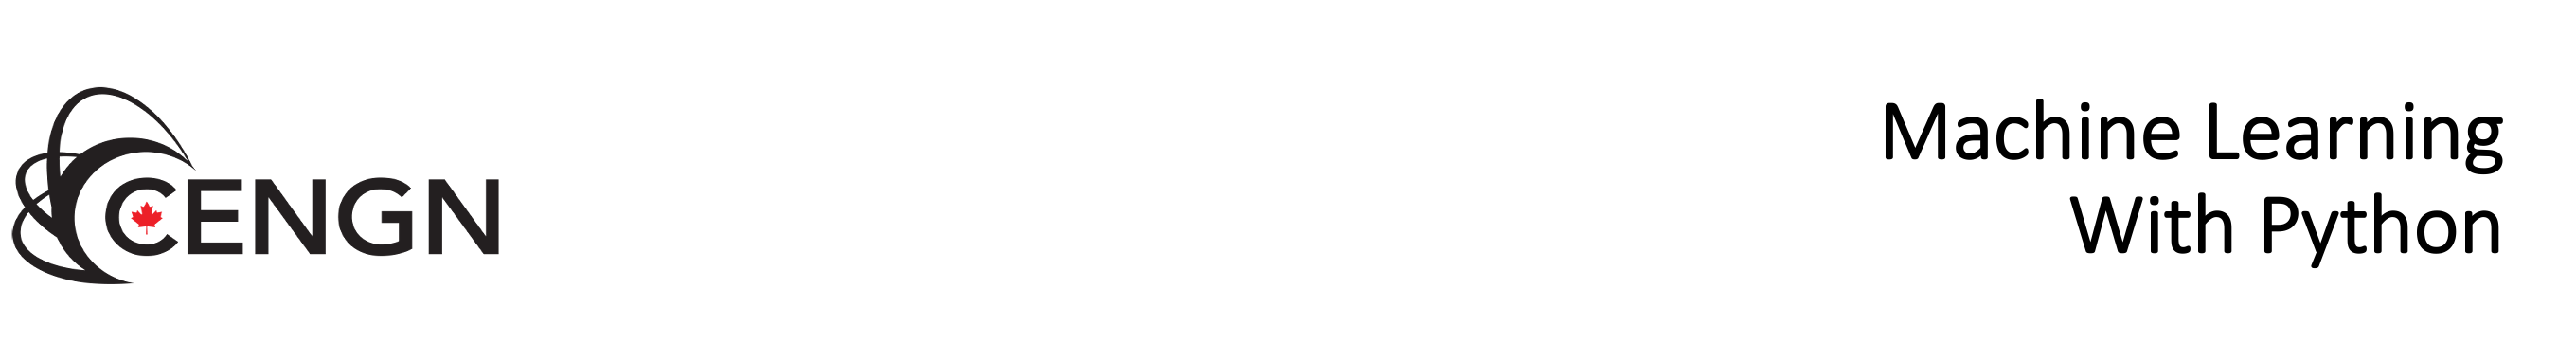
___

# **Section 3.3. Hands-On Regression**

## **Lab 2: Regression Trees**

**Step 1: Importing Libraries**

In [1]:
# Import relevant libraries and functions
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
#from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

print('Libraries have been imported.')

Libraries have been imported.


**Step 2: Importing the Dataset**

Import the `hitters.csv` dataset using pandas library.

In [2]:
# Import data from Hitters.csv

df = pd.read_csv('hitters.csv', index_col=0)

**Step 3: Inspecting Data**

In [3]:
# Display 10 random rows of data to inspect and ensure data is imported correctly

df.sample(n=10) 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-George Foster,284,64,14,30,42,24,18,7023,1925,348,986,1239,666,N,E,96,4,4,NaN,N
-Mike Marshall,330,77,19,47,53,27,6,1928,516,90,247,288,161,N,W,149,8,6,670.0,N
-Tom O'Malley,181,46,1,19,18,17,5,937,238,9,88,95,104,A,E,37,98,9,NaN,A
-Jim Traber,212,54,13,28,44,18,2,233,59,13,31,46,20,A,E,243,23,5,NaN,A
-Mickey Hatcher,317,88,3,40,32,19,8,2543,715,28,269,270,118,A,W,220,16,4,NaN,A
-Johnny Ray,579,174,7,67,78,58,6,3053,880,32,366,337,218,N,E,280,479,5,657.0,N
-Mike Pagliarulo,504,120,28,71,71,54,3,1085,259,54,150,167,114,A,E,103,283,19,175.0,A
-Billy Sample,200,57,6,23,14,14,9,2516,684,46,371,230,195,N,W,69,1,1,NaN,N
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
-Gary Gaetti,596,171,34,91,108,52,6,2862,728,107,361,401,224,A,W,118,334,21,900.0,A


In [4]:
# Check the data types
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

For this exercise, we are interested in three features: Hits, Years and Salary features. Looking at the value of those features, `Salary` has some NaN values. 

Inspecting the data types shows that `Hits` and `Years` are `int64` and `Salary` is `float64`, which is fine.

**Step 4: Data Cleaning**

Depending on the use case, NaN values can be removed or replaced by specific values like the mean or zero. In real-world scenarios, a data scientist should consult with a subject matter expert to ask why data is missing. He might take different reactions based on the situation.

In this lab, we will remove observations that are missing `Salary` values using `dropna()` pandas function.
Note that `Salary` is measured in thousands of dollars.

In [5]:
# Drop rows with missing data

df = df.dropna()     

**Note:** To replace the NaN values, use the `fillna()` pandas function, for example, fillna(0) will replace all NaN values with zero.

**Step 5: Data Visualization**

Let us now visualize the data to get a better sense of the problem. Visualization is usually a good first step before we employ a machine learning technique. We also use this opportunity to introduce some more features of matplotlib that aid in data visualization. Feel free to play around with various properties of the plot to understand their effects. Also refer to [Matplotlib's documentation](https://matplotlib.org/contents.html#).  

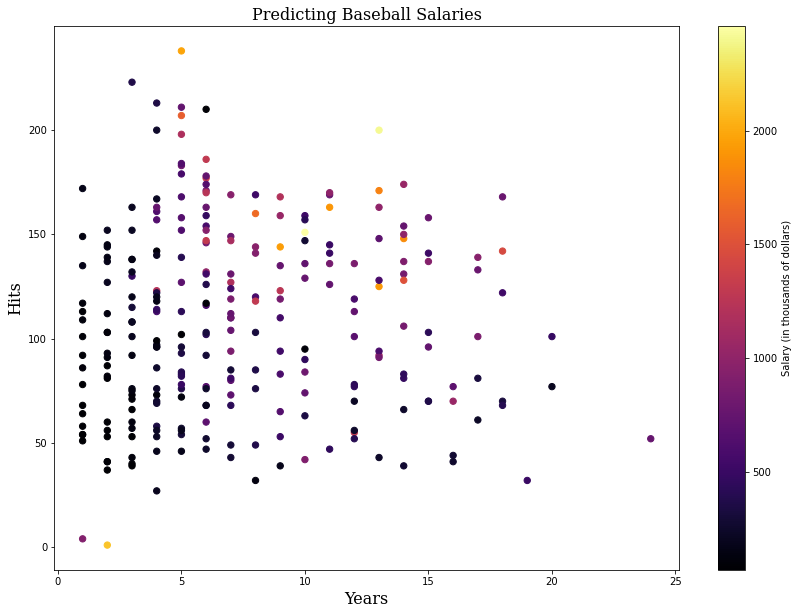

In [6]:
# Specify the figure size

fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (14,10)

# Define font characteristics which will be used later for plot title 

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 16,
        }
        
# Generate a plot

plt.scatter(x=df['Years'], y=df['Hits'], c=df['Salary'], s=40, cmap='inferno')
plt.title("Predicting Baseball Salaries",
          fontdict=font)
plt.xlabel("Years", fontdict=font)
plt.ylabel("Hits", fontdict=font)
color_bar = plt.colorbar()
color_bar.ax.set_ylabel('Salary (in thousands of dollars)')
plt.show()

Let us now visualize the predicted variable (`Salary`) by plotting its histogram.

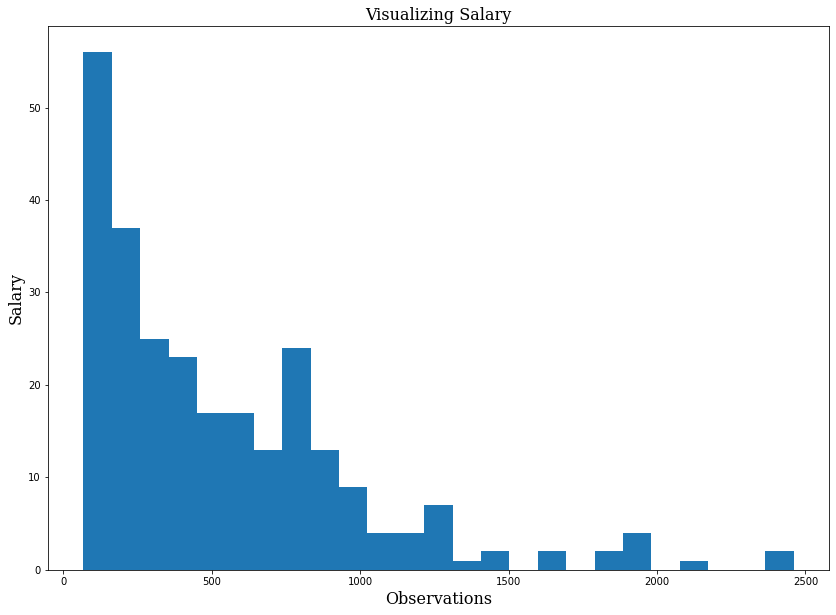

In [7]:
# Histogram of Salary with 25 bins

plt.hist(df['Salary'],bins=25)
plt.title("Visualizing Salary",
          fontdict=font)
plt.xlabel("Observations", fontdict=font)
plt.ylabel("Salary", fontdict=font)

plt.show()

As we would expect, the distribution of salaries is highly skewed. There are few "superstar" players who are paid much more relative to the rest. Most machine learning techniques do not perform well when the data is highly skewed. An easy technique to "de-skew" such data is to perform a logarithmic transformation, that is, consider the logarithm of the predicted variable. Let us now plot a histogram of log(`Salary`) to see if it de-skews the data. 

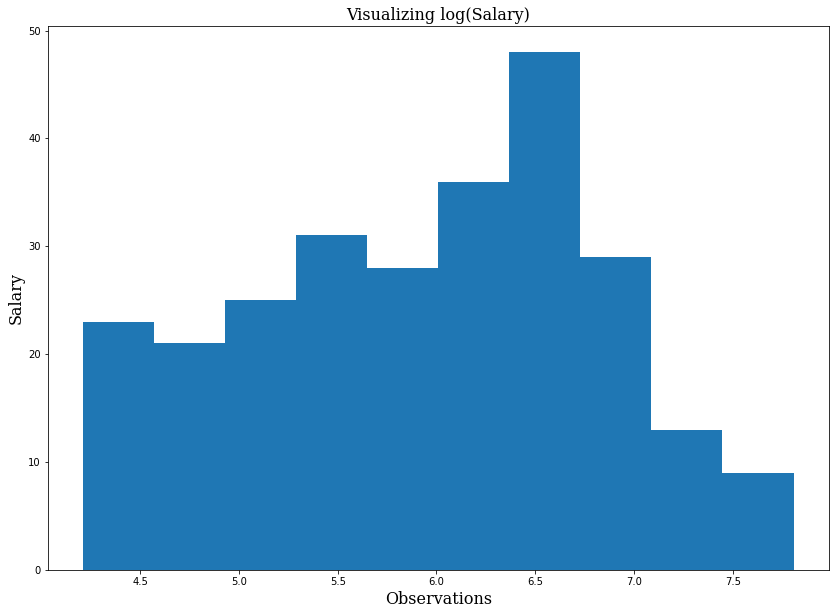

In [8]:
# Histogram of log(Salary)

plt.hist(np.log(df['Salary']))

plt.title("Visualizing log(Salary)",
           fontdict=font)
plt.xlabel("Observations", fontdict=font)
plt.ylabel("Salary", fontdict=font)

plt.show()

**Step 6: Defining the Variables**

Now, the data appears much more balanced and seems more or less normally distributed. Therefore, we will use our predictor variables (`Years` and `Hits`) and try to predict the logarithm of the predictor variable, that is log(`Salary`). 

In [9]:
X = df[['Years', 'Hits']]
y = np.log(df['Salary'])

In [10]:
# Split the data to test and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# test_size parameter defines the fraction of data that will be used as test data

**Step 7: Running a Decision Tree Model**

The following function runs a regression tree on our data. 

In general, as we have seen in Module 1, several machine learning algorithms are stochastic in nature. This implies that different runs of the same algorithm might result in slightly different outputs. For instructional purposes, it is ideal to however have reproducible outputs and this is achieved by setting a `random_state`. If we do not provide a `random_state` argument to the function, it is possible our algorithm's output changes slightly each time it is run. 

In [11]:
# Regression tree on the training set

tree_1 = DecisionTreeRegressor(random_state=0)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [12]:
# Perform the prediction using the test set

predictions_1=tree_1.predict(X_test)

In [13]:
# Compute the MSE

metrics.mean_squared_error(y_test, predictions_1)

0.5169494587029303

Recall that the MSE value by itself is not meaningful, we have to compare it with an MSE value of another model to determine which model performs better. Let's tune our regression tree model to enhance the model performance.

For that, we will now use the function argument `max_leaf_nodes`. It tells the function how large a regression tree  it should try to fit. The higher the `max_leaf_nodes` value, the larger our regression tree will be. Since our data is relatively simple with only two predictor variables, it suffices to set a reasonably low value for max_leaf_nodes. This also enhances interpretability of the final regression tree.

So, let us run our regression model with defined leaf node values and compute the new MSE. 

In [14]:
# Regression tree on training set using a defined leaf node value

tree_2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)
tree_2.fit(X_train, y_train)

# Perform the prediction using the test set

predictions_2=tree_2.predict(X_test)

# Compute the MSE

metrics.mean_squared_error(y_test, predictions_2)

0.439715063500708

Notice that the MSE value is now around 0.43, which means model `tree_2` performs better than model `tree_1`.

In [15]:
# Regression tree on training set using a defined leaf node value

tree_3 = DecisionTreeRegressor(max_leaf_nodes=9, random_state=0)
tree_3.fit(X_train, y_train)

# Perform the prediction using the test set

predictions_3=tree_3.predict(X_test)

# Compute the MSE

metrics.mean_squared_error(y_test, predictions_3)

0.3103601382632203

Notice that the MSE value is now around 0.3, which means that model `tree_3` performs better than models `tree_1` and `tree_2`.

Now, visualize the results of our regression tree algorithm. For simplicity, we will use the three-node model.

In [16]:
dot_data = export_graphviz(tree_3,
                           feature_names=['Years', 'Hits'],
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()

# Save the plot as a png file in the current notebook folder

graph.write_png('python_decision_tree.png')

True

Check the M3 folder, you should have a file named: python_decision_tree.png

In [17]:
# Regression tree on training set using a defined leaf node value

tree_4 = DecisionTreeRegressor(max_leaf_nodes=4, random_state=0)
tree_4.fit(X_train, y_train)

# Perform the prediction using the test set

predictions_4=tree_4.predict(X_test)

# Compute the MSE

metrics.mean_squared_error(y_test, predictions_4)

0.41629010874269995

In [24]:
dot_data2 = export_graphviz(tree_4,
                           feature_names=['Years', 'Hits'],
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2)
nodes2 = graph2.get_node_list()

# Save the plot as a png file in the current notebook folder

graph2.write_png('python_decision_tree2.png')

True

## **Regression Exercise**

In real-world scenarios, a data scientist tries different models before deciding which is the best fit for a certain problem. 

Run a linear regression model on the above dataset, evaluate your model performance, and determine which model performs better on the `hitters.csv` dataset.

Dataframe shape is: (263, 20)


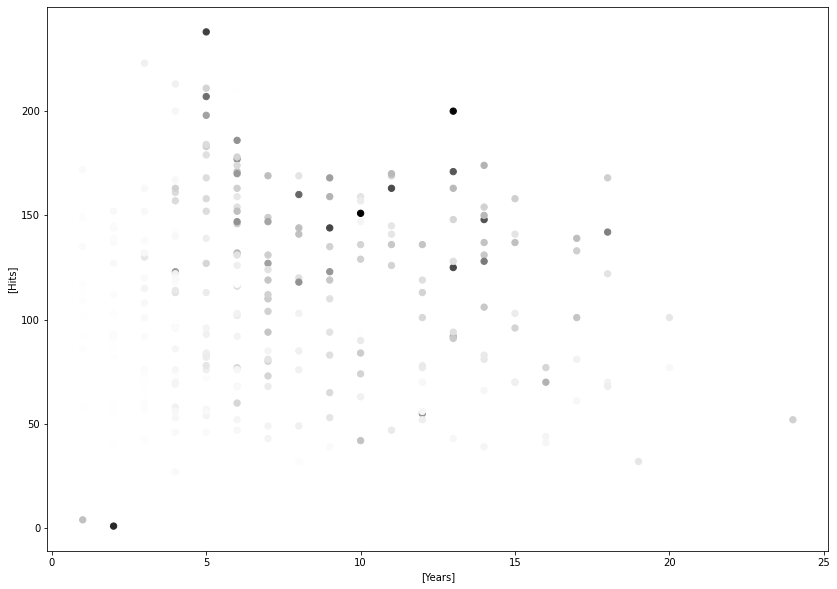

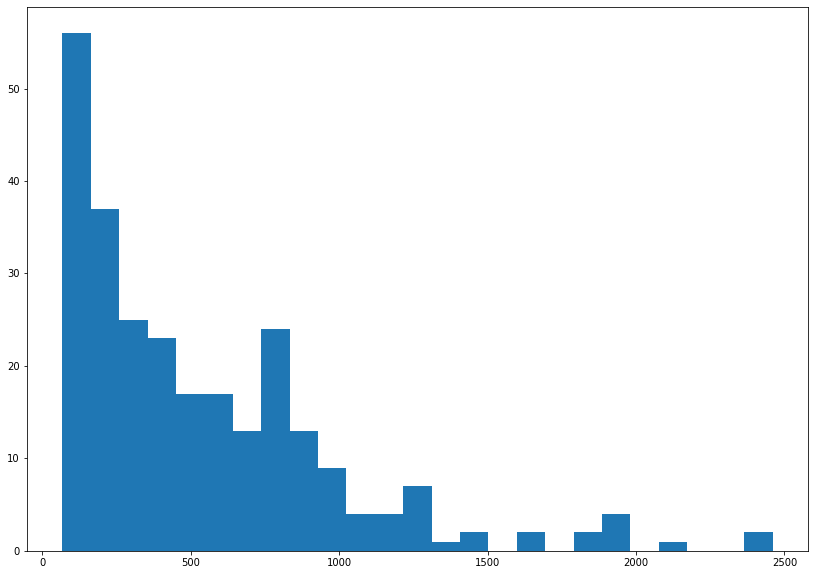

In [19]:
# Inspect the dataset
print("Dataframe shape is:", df.shape)
df.head()
df.plot.scatter(x=['Years'], y=['Hits'], c=df['Salary'], s=40)
plt.show()
his = plt.hist(df['Salary'], bins=25)

In [20]:
# Define the variables
X = df[['Years', 'Hits']]
y = np.log(df['Salary'])

In [21]:
# Split the data with a 70-30 split
# Use random_state = 101

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# test_size parameter defines the fraction of data that will be used as test data

In [22]:
# Run the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
pred = mlr.predict(X_test)

# Print the coefficients

print ("intercept : ",mlr.intercept_)
print ("coefficient : ",mlr.coef_)

import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols('Salary ~ Years + Hits', df).fit()
est.summary()

intercept :  4.103911357539663
coefficient :  [0.0982326  0.01021792]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     68.94
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           9.51e-25
Time:                        21:28:46   Log-Likelihood:                -1924.1
No. Observations:                 263   AIC:                             3854.
Df Residuals:                     260   BIC:                             3865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -199.2510     67.469     -2.953      0.003    -332.106     -66.396
Years         36.9501      4.719      7.831      0.000      27.658      46.242
Hits           4.3124      0.501      8.603      0.000       3.325       5.299
==============================================================================
Omnibus:                      134.838   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              780.666
Skew:                           2.034   Prob(JB):                    3.02e-170
Kurtosis:                      10.395   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Obtain the MSE
metrics.mean_squared_error(y_test, pred)

0.46398735167539373

## **LMS Upload**

Once you complete the above exercise, save the code snippet to a text file and upload it to the LMS under the Uploads tab in the field name: ML Regression Exercise.

Remember to shutdown this notebook once done from this lab.

### **Switch to LMS**

Switch to LMS to review the lab results, complete review questins, and then start with Section 3.4 (Classification Models).